In [235]:
# Import der Module
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, LinearLocator
import seaborn as sns
import numpy as np

In [236]:
# Daten laden
def load_data():
    """
    Lädt die Daten aus einer CSV-Datei und gibt einen DataFrame zurück.
    
    Returns:
        pd.DataFrame: DataFrame mit den geladenen Daten
    """
    df = pd.read_csv("autoscout24.csv")
    return df

df = load_data()

In [237]:
# DataFrame betrachten
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [238]:
df.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [240]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [241]:
def clean_data(df):
    """
    Reinigt den DataFrame und bereitet ihn für die Analyse vor.

    Args:
        df (pd.DataFrame): Ursprünglicher DataFrame

    Returns:
        pd.DataFrame: Bereinigter DataFrame
    """

    # Zeilen mit fehlenden oder null Werten entfernen
    df = df.dropna().reset_index(drop=True)

    # Ungültige Zeilen aus der Spalte 'hp' entfernen
    df = df[df['hp'] != 'null']

    # Den Datentyp der Spalte 'hp' in int ändern
    df['hp'] = df['hp'].astype(int)

    # Zeilen mit ungewöhnlich hohen oder niedrigen Werten entfernen
    df = df[(df['mileage'] >= 0) & (df['mileage'] < 1000000)]
    df = df[(df['price'] > 200) & (df['price'] < 2000000)]
    df = df[(df['hp'] > 1) & (df['hp'] < 2000)]

    return df

df = clean_data(df)
df.describe()

,mileage,price,hp,year
count,46069.000000,4.606900e+04,46069.000000,46069.000000
mean,71208.485685,1.656349e+04,132.996831,2016.012177
std,62265.682553,1.927993e+04,75.073280,3.155537
min,0.000000,1.100000e+03,5.000000,2011.000000
25%,19900.000000,7.490000e+03,86.000000,2013.000000
50%,60000.000000,1.100000e+04,116.000000,2016.000000
75%,105000.000000,1.949000e+04,150.000000,2019.000000
max,699000.000000,1.199900e+06,850.000000,2021.000000


In [242]:
# Welche Angebotsmöglichkeiten gibt es im DataFrame?
print(df["offerType"].unique())

['Used' 'Demonstration' "Employee's car" 'Pre-registered' 'New']


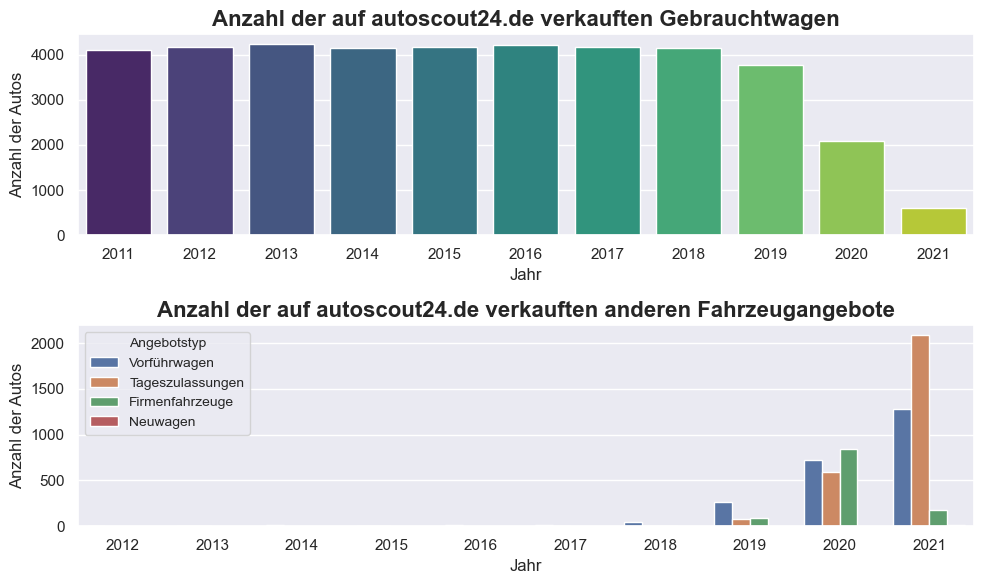

In [243]:
def plot_car_data(df):
    # Erstellung eines DataFrame für Gebrauchtwagen
    used_cars_df = df[df['offerType'] == 'Used']
    num_used_cars_per_year = used_cars_df.groupby('year').size()

    # Erstellung eines DataFrame für restliche offerTypes
    filtered_offer_types = ['Demonstration', "Employee's car", 'Pre-registered', 'New']
    filtered_df = df[df['offerType'].isin(filtered_offer_types)]

    # Dictionary zur Übersetzung der "offer Types"
    translation_dict = {
        'Demonstration': 'Vorführwagen',
        "Employee's car": 'Firmenfahrzeuge',
        'Pre-registered': 'Tageszulassungen',
        'New': 'Neuwagen',
        'Used': 'Gebrauchtwagen'
    }
    filtered_df.loc[:, 'offerType'] = filtered_df['offerType'].map(translation_dict)
    num_cars_per_year_offerType_filtered = filtered_df.groupby(['year', 'offerType']).size().reset_index(name='count')

    # Erstellung der Subplots
    fig, axs = plt.subplots(2, 1, figsize = (10, 6))

    # Plot für die Anzahl der verkauften Gebrauchtwagen pro Jahr
    sns.barplot(x = num_used_cars_per_year.index, y = num_used_cars_per_year.values, ax = axs[0], palette='viridis')
    axs[0].set_title("Anzahl der auf autoscout24.de verkauften Gebrauchtwagen", fontsize = 16, fontweight = 'bold')
    axs[0].set_xlabel("Jahr", fontsize = 12)
    axs[0].set_ylabel("Anzahl der Autos", fontsize = 12)

    # Plot für die Anzahl der verkauften anderen Fahrzeugangebote pro Jahr
    sns.barplot(x = 'year', y = 'count', hue = 'offerType', data = num_cars_per_year_offerType_filtered, ax = axs[1])
    axs[1].set_title("Anzahl der auf autoscout24.de verkauften anderen Fahrzeugangebote", fontsize = 16, fontweight = 'bold')
    axs[1].set_xlabel("Jahr", fontsize = 12)
    axs[1].set_ylabel("Anzahl der Autos", fontsize = 12)
    axs[1].legend(title='Angebotstyp', title_fontsize = '10', loc = 'upper left', fontsize = '10')

    plt.tight_layout()
    #st.pyplot(fig)  # Figur an st.pyplot übergeben
    plt.show()

plot_car_data(df)

In [244]:
# Welche Automarken sind im DataFrame vorhanden?
print(df["make"].unique())
print(len(df["make"].unique()))

['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Mitsubishi' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru' 'Dodge' 'Microcar'
 'Lamborghini' 'Lada' 'Tesla' 'Chrysler' 'McLaren' 'Aston' 'Rolls-Royce'
 'Lancia' 'Abarth' 'DS' 'Daihatsu' 'Ligier' 'Ferrari' 'Aixam' 'Zhidou'
 'Morgan' 'Maybach' 'RAM' 'Alpina' 'Polestar' 'Brilliance' 'Piaggio'
 'FISKER' 'Others' 'Cadillac' 'Iveco' 'Isuzu' 'Corvette' 'Baic' 'DFSK'
 'Estrima' 'Alpine']
71


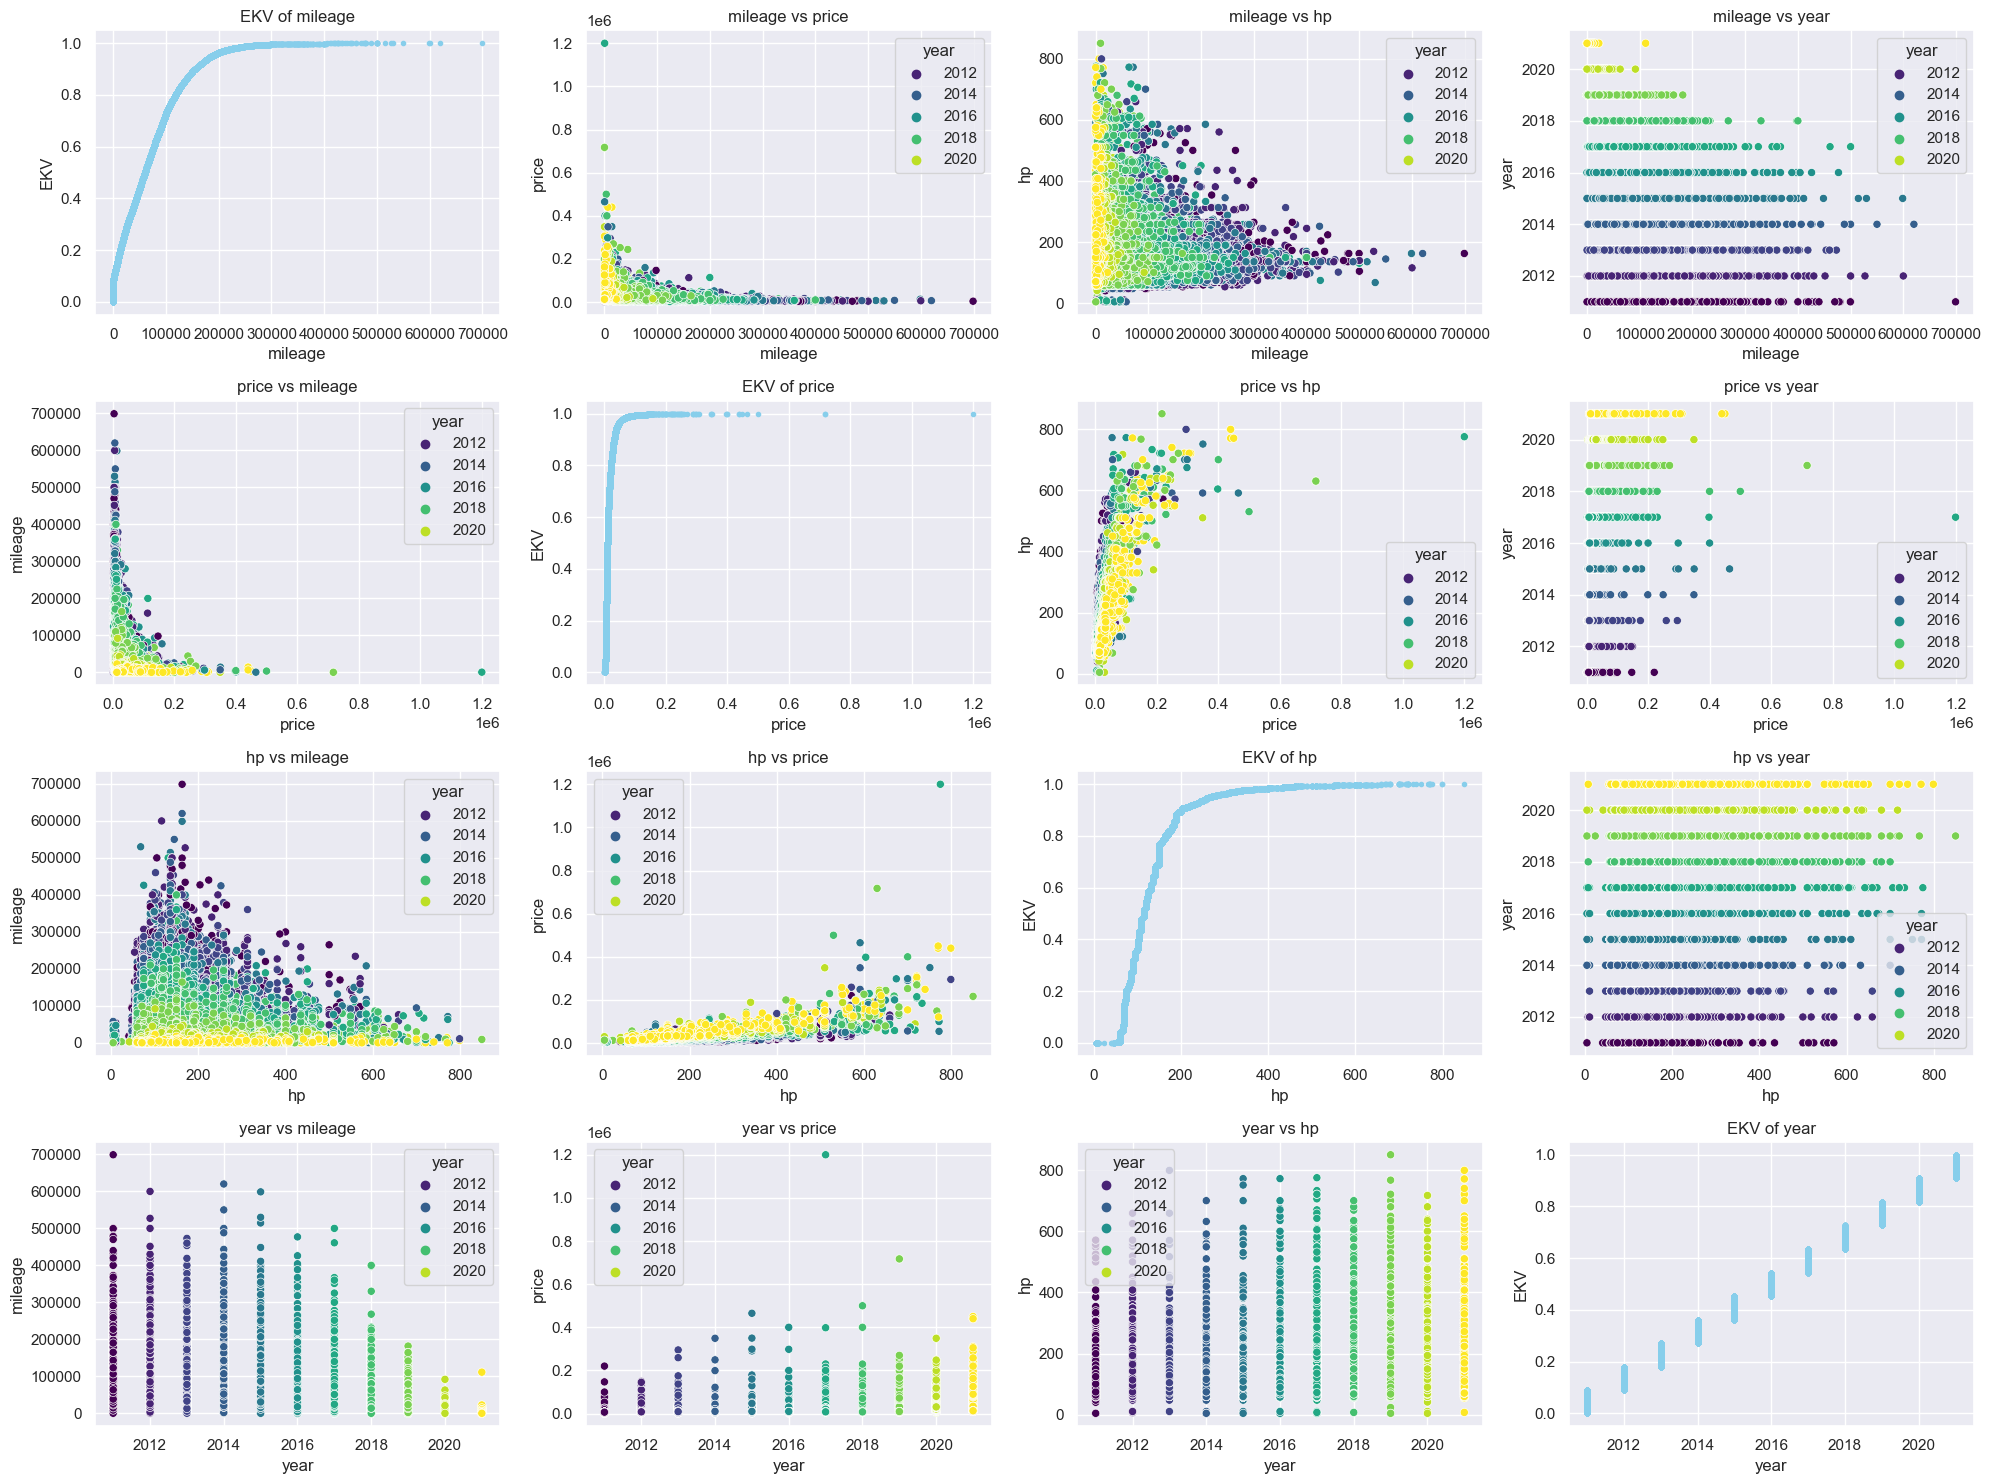

In [245]:
# Liste der numerischen Features
numerical_features = ['mileage', 'price', 'hp', 'year']

def plot_ecdf(data, feature, color='skyblue'):
    """
    Plottet die empirische kumulative Verteilungsfunktion (EKV) für ein gegebenes Feature.
    
    Args:
        data (pd.DataFrame): Der Datensatz, der das Feature enthält.
        feature (str): Der Name des Features, für das die EKV geplottet werden soll.
        color (str): Die Farbe des EKV-Plots.
    
    Returns:
        None
    """
    # Daten für das Feature sortieren
    x = np.sort(data[feature])
    # EKV-Werte berechnen
    y = np.arange(1, len(x) + 1) / len(x)
    # EKV plotten
    plt.plot(x, y, marker = '.', linestyle = 'none', color = color)
    plt.title(f'EKV of {feature}')
    plt.xlabel(feature)
    plt.ylabel('EKV')

# Einstellungen für die Visualisierung
plt.figure(figsize = (20, 15))

# Scatterplots und EKVs für die numerischen Features erstellen
for i, feature1 in enumerate(numerical_features):
    for j, feature2 in enumerate(numerical_features):
        plt.subplot(len(numerical_features), len(numerical_features), i*len(numerical_features) + j + 1)
        if feature1 == feature2:
            # EKV anstelle von Histogramm, wenn beide Features identisch sind
            plot_ecdf(df, feature1)
        else:
            # Scatterplot erstellen
            sns.scatterplot(data = df, x = feature1, y = feature2, hue = 'year', palette = 'viridis', s = 35)
            plt.title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()

In [ ]:
  # Analyse der Scatterplots

    # mileage vs price: Es gibt eine schwache negative Korrelation zwischen dem Kilometerstand (`mileage`) und dem Preis (`price`). Autos mit geringerem Kilometerstand neigen dazu, teurer zu sein.

    # mileage vs hp: Keine deutliche Korrelation.

    # mileage vs year: Es gibt eine negative Korrelation zwischen dem Kilometerstand (`mileage`) und dem Baujahr (`year`). Neuere Autos haben weniger Kilometer zurückgelegt.

    # price vs hp: Es gibt eine positive Korrelation zwischen dem Preis (`price`) und den Pferdestärken (`hp`). Autos mit mehr PS sind teurer.

    # price vs year: Es gibt eine leichte positive Korrelation zwischen dem Preis (`price`) und dem Baujahr (`year`). Neuere Autos sind teurer als ältere.

    # hp vs year: Keine deutliche Korrelation.

c:\Users\stefa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\stefa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\stefa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\stefa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

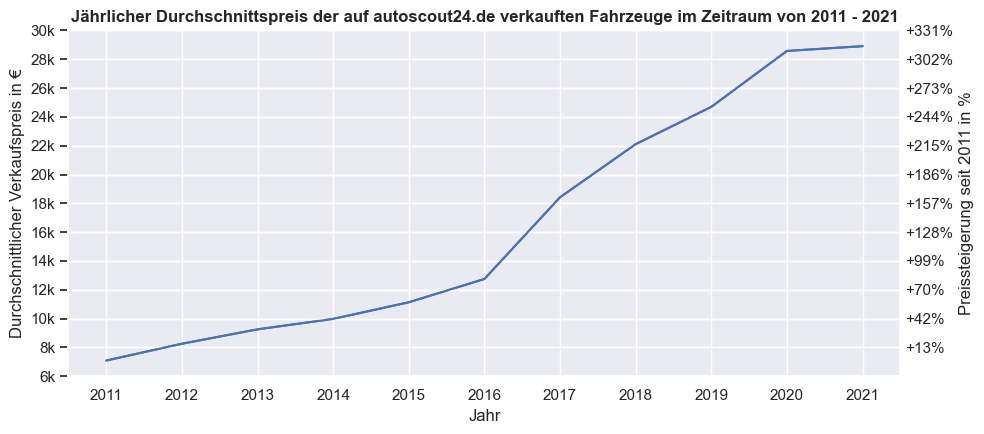

In [248]:
def plot_avg_car_price(df):
    """
    Erstellt einen Plot, der die durchschnittlichen Verkaufspreise von Autos sowie deren Preissteigerung über die Jahre darstellt.

    Args:
        df (pandas.DataFrame): Dataframe, das die Autodaten enthält. Es muss eine Spalte 'year' und eine Spalte 'price' geben.

    Returns:
        None: Die Funktion gibt nichts zurück, aber sie zeigt ein Plot an.
    """
    sns.set_style("darkgrid")

    # Daten aufbereiten
    avg_price_per_year = df.groupby('year')['price'].mean()
    price_increase_percent = (avg_price_per_year / avg_price_per_year.loc[2011] - 1) * 100
    
    def plus_percent(x, pos):
        """
        Hilfsfunktion für die % Formatierung der y-Achse.
        """
        return f"+{int(x)}%"
    
    def hide_lowest_tick(ax):
        """
        Versteckt die Beschriftung des niedrigsten Ticks auf der y-Achse.
        """
        yticks = ax.yaxis.get_major_ticks()
        if yticks:
            yticks[0].label2.set_visible(False)

    def thousands(x, pos):
        """
        Hilfsfunktion für die Tausenderformatierung der y-Achse.
        """
        return '%1.0fk' % (x * 1e-3)
    
    # Plot erstellen
    fig, ax = plt.subplots(figsize = (10, 4.5))
    sns.lineplot(x = avg_price_per_year.index,
                 y = avg_price_per_year.values, 
                 ax = ax)
    ax.set_title('Jährlicher Durchschnittspreis der auf autoscout24.de verkauften Fahrzeuge im Zeitraum von 2011 - 2021', 
                fontsize=12, fontweight='bold')
    ax.set_xlabel('Jahr', fontsize=12)
    ax.set_ylabel('Durchschnittlicher Verkaufspreis in €', fontsize = 12)
    ax.set_xticks(range(min(avg_price_per_year.index), max(avg_price_per_year.index) + 1))
    formatter = FuncFormatter(thousands)
    ax.yaxis.set_major_formatter(formatter)
    axes2 = ax.twinx()
    sns.lineplot(x=price_increase_percent.index,
                 y=price_increase_percent.values, 
                 ax=axes2)
    axes2.set_ylabel('Preissteigerung seit 2011 in %', fontsize = 12)
    axes2.yaxis.set_major_formatter(FuncFormatter(plus_percent))
    axes2.tick_params(axis = 'y', which='both', length = 0)
    ax.yaxis.set_major_locator(LinearLocator(13))
    axes2.yaxis.set_major_locator(LinearLocator(13))
    hide_lowest_tick(axes2)
    initial_avg_price = avg_price_per_year.loc[2011]

    plt.tight_layout()
    #st.pyplot(fig)  # Figur an st.pyplot übergeben
    plt.show()

plot_avg_car_price(df)